
UAS MACHINE LEARNING  
Name: Felicia Audrey Tanujaya  

# Case: Clustering Clothing Company Customers




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import RobustScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score, davies_bouldin_score

In [ ]:
df= pd.read_csv('2A.tsv',sep='\t')
df.head()

,Customer ID,Birth Date,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,1969/03/05,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,2005/07/01,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,1974/12/01,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,2003/11/21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,1979/09/13,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


## Part A Exploratory Data Analysis

In [ ]:
#Data type, Summary statistics
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Birth Date                3900 non-null   object 
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

,Customer ID,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,59.764359,3.749949,25.351538
std,1125.977353,23.685392,0.716223,14.447125
min,1.000000,20.000000,2.500000,1.000000
25%,975.750000,39.000000,3.100000,13.000000
50%,1950.500000,60.000000,3.700000,25.000000
75%,2925.250000,81.000000,4.400000,38.000000
max,3900.000000,100.000000,5.000000,50.000000


In [ ]:
#Feature engineering
#Deriving age from birthdate
df['Birth Date'] = pd.to_datetime(df['Birth Date'])
df['Age'] = datetime.now().year - df['Birth Date'].dt.year
df.drop('Birth Date', axis=1, inplace=True)

In [ ]:
df.isnull().sum()

,0
Customer ID,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0
Review Rating,0


In [ ]:
#Checking for duplicates
df.duplicated().sum()

0

In [ ]:
#Create separate list for categorical and numerical columns
categorical = []
numerical = []

for i in df.columns:
    if df[i].dtype == 'object':
        categorical.append(i)
    else:
        numerical.append(i)

print(f'Categorical: {categorical}')
print(f'Numerical: {numerical}')

Categorical: ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Preferred Payment Method', 'Frequency of Purchases']
Numerical: ['Customer ID', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases', 'Age']


In [ ]:
numerical.remove('Customer ID')
df.drop('Customer ID', axis=1, inplace=True)

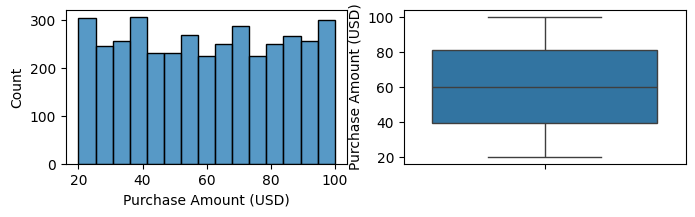

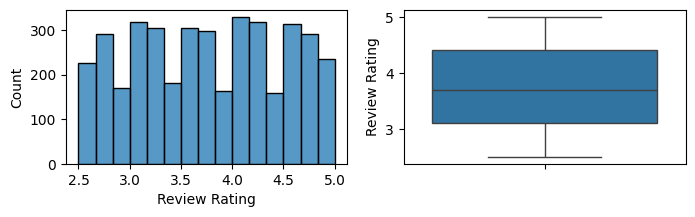

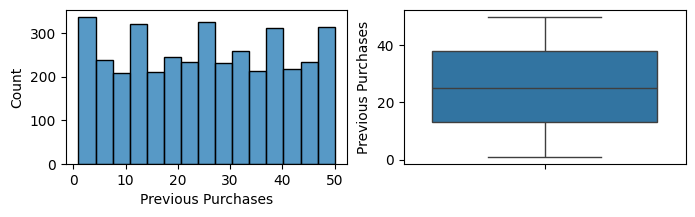

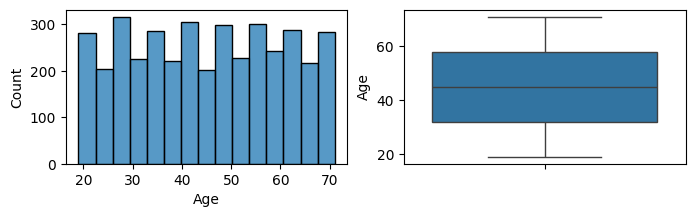

In [ ]:
#Check distribution of all features
def check_dist(df, column):
    for i in column:
        plt.figure(figsize=(8,2))
        plt.subplot(1,2,1)
        sns.histplot(df[i], bins=15)

        plt.subplot(1,2,2)
        sns.boxplot(y=df[i])
        plt.show()

check_dist(df[numerical], numerical)

In [ ]:
for i in categorical:
    print(df[i].value_counts(),'\n')

Gender
Male      2642
Female    1231
f           17
M           10
Name: count, dtype: int64 

Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64 

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64 

Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota 

In [ ]:
#Standardizing gender column
df['Gender'] = df['Gender'].replace({'f': 'Female', 'm': 'Male', 'M':'Male'})

In [ ]:
df['Frequency of Purchases'] = df['Frequency of Purchases'].replace({'Every 3 Months': 'Quarterly'})

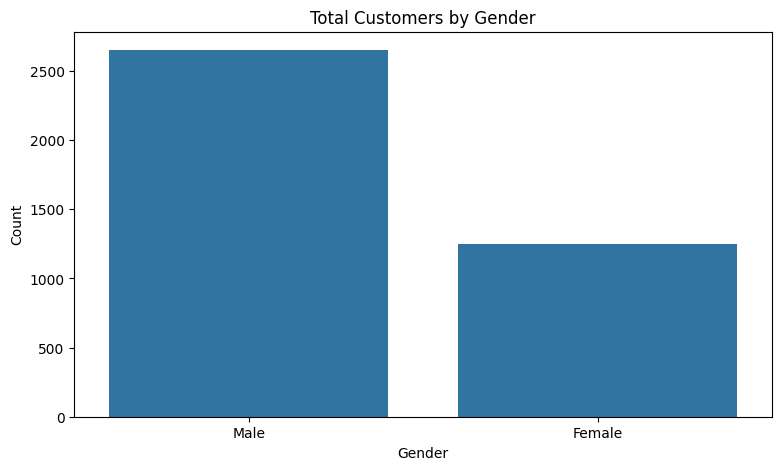

Gender
Male      2652
Female    1248
Name: count, dtype: int64


In [ ]:
#Total customers per gender
plt.figure(figsize=(9,5))
sns.countplot(df, x='Gender')
plt.title('Total Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
print(df['Gender'].value_counts())

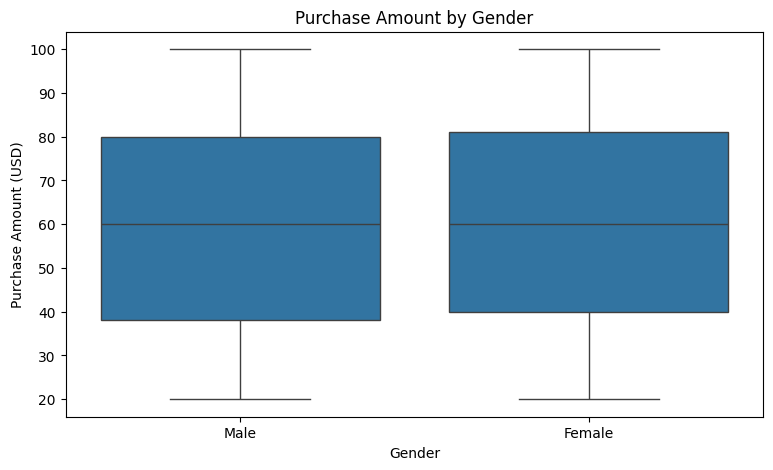

Gender
Female    60.249199
Male      59.536199
Name: Purchase Amount (USD), dtype: float64


In [ ]:
#Purchase amount by gender
plt.figure(figsize=(9,5))
sns.boxplot(df, x='Gender', y='Purchase Amount (USD)')
plt.title('Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount (USD)')
plt.show()
print(df.groupby('Gender')['Purchase Amount (USD)'].mean())

The first chart highlights a clear majority of male customers, totaling 2652 customers compared to only 1248 female customers. Despite this gap, the 2nd chart reveals that both male and female customers have a similar average purchase amount with females slightly higher.This means that while there are fewer female customers, they tend to spend more compared to male customers (even if the difference isnt so significant).

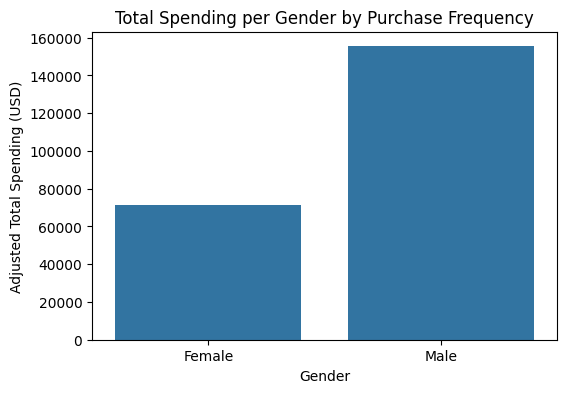

In [ ]:
df['Total Spending'] = df['Purchase Amount (USD)'] * df['Frequency of Purchases'].map({
    'Daily': 30, 'Weekly': 4, 'Fortnightly': 2,'Monthly': 1, 'Annually': 1/12
})

total_adjusted_spend = df.groupby('Gender')['Total Spending'].sum().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(data=total_adjusted_spend, x='Gender', y='Total Spending')
plt.title('Total Spending per Gender by Purchase Frequency')
plt.xlabel('Gender')
plt.ylabel('Adjusted Total Spending (USD)')
plt.show()

df.drop('Total Spending', axis=1, inplace=True)

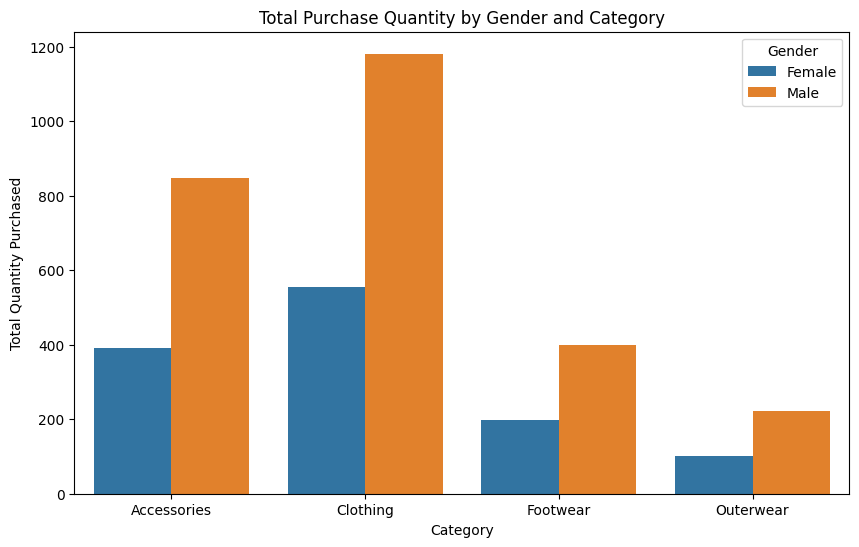

In [ ]:
df['Purchase Count'] = 1
category_count = df.groupby(['Gender', 'Category'])['Purchase Count'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=category_count, y='Purchase Count', x='Category', hue='Gender')
plt.title('Total Purchase Quantity by Gender and Category')
plt.xlabel('Category')
plt.ylabel('Total Quantity Purchased')
plt.show()

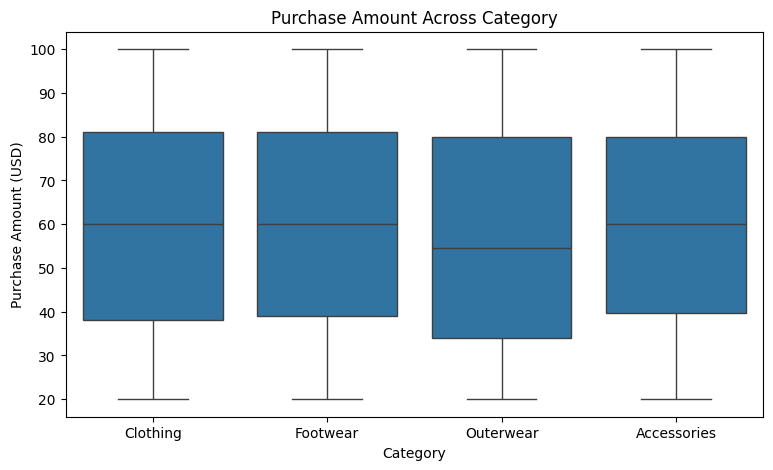

In [ ]:
#purchase amount distribution per category
plt.figure(figsize=(9,5))
sns.boxplot(df, x='Category', y='Purchase Amount (USD)')
plt.title('Purchase Amount Across Category')
plt.xlabel('Category')
plt.ylabel('Purchase Amount (USD)')
plt.show()

No significant differences between the categories, but there's an indication that customers tend to spend slightly less on outerwear compared to other categories.

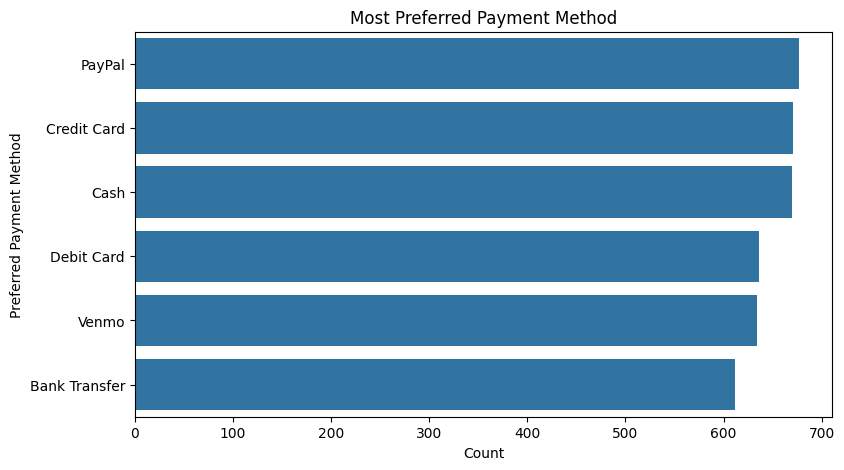

In [ ]:
#Most preferred payment method
payment_method_counts = df['Preferred Payment Method'].value_counts()
plt.figure(figsize=(9, 5))
sns.barplot(x=payment_method_counts.values, y=payment_method_counts.index)
plt.xlabel('Count')
plt.ylabel('Preferred Payment Method')
plt.title('Most Preferred Payment Method')
plt.show()

The chart above suggests that most customers prefer Paypal as their payment method, followed by Credit Card and Cash. On the other hand Bank Transfer stands as the least prefrred payment method.

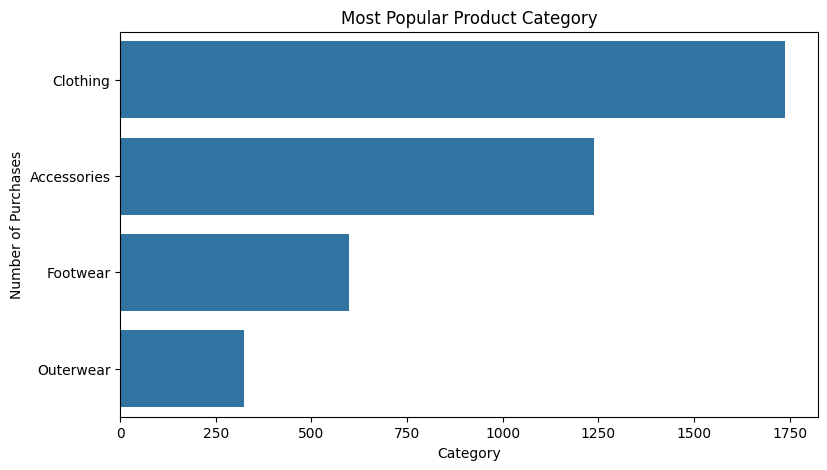

In [ ]:
#Most popular product category
category_counts = df['Category'].value_counts()
plt.figure(figsize=(9,5))
sns.barplot(y=category_counts.index, x=category_counts.values)
plt.title('Most Popular Product Category')
plt.xlabel('Category')
plt.ylabel('Number of Purchases')
plt.show()

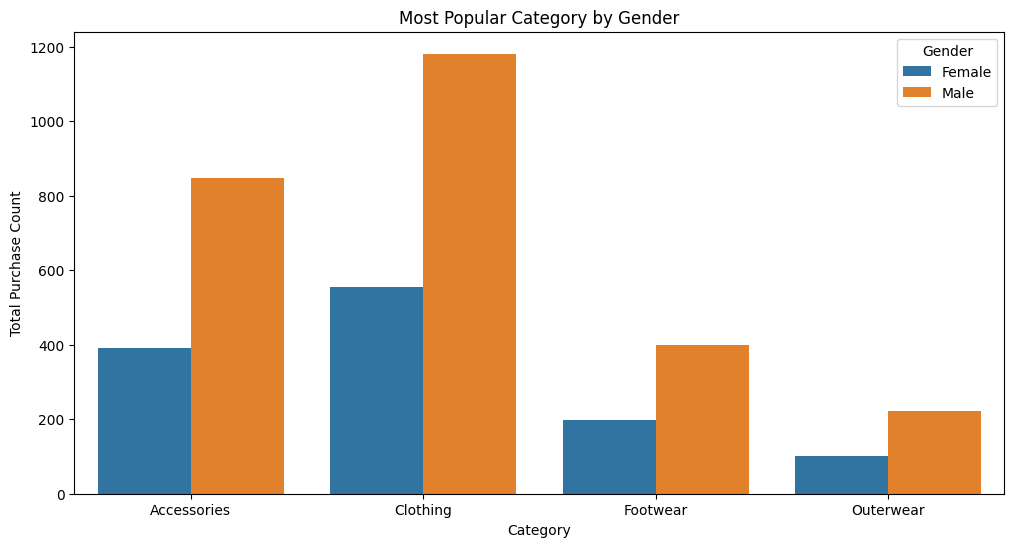

In [ ]:
category_gender = df.groupby(['Gender', 'Category'])['Purchase Count'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(category_gender, x='Category', y='Purchase Count', hue='Gender')
plt.title('Most Popular Category by Gender')
plt.xlabel('Category')
plt.ylabel('Total Purchase Count')
plt.show()

These two charts suggest that Clothing is the most popular category followed by Accesories, whereas outerwear stand as the least popular. This trend is similar between the two gender classes (based on the frequency of purchase).

In [ ]:
gender_purchase = df.groupby(['Gender', 'Category'])['Purchase Amount (USD)'].mean().reset_index()
gender_purchase

,Gender,Category,Purchase Amount (USD)
0,Female,Accessories,60.762755
1,Female,Clothing,60.496403
2,Female,Footwear,59.472362
3,Female,Outerwear,58.425743
4,Male,Accessories,59.411557
5,Male,Clothing,59.803556
6,Male,Footwear,60.645000
7,Male,Outerwear,56.605381


The table above suggests that Female tend to spend more on Accesories and Clothing whereas Male customers tend to spend more on Footwear and Clothing.

In [ ]:
##Encoding
label_encoder = LabelEncoder()
for col in ['Gender', 'Subscription Status', 'Discount Applied', 'Promo Code Used']:
    df[col] = label_encoder.fit_transform(df[col])

oh_cols = ['Category', 'Item Purchased', 'Color', 'Shipping Type', 'Payment Method', 'Preferred Payment Method', 'Location', 'Season', 'Frequency of Purchases']
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
oh_encoded = onehot_encoder.fit_transform(df[oh_cols])
oh_encoded_df = pd.DataFrame(oh_encoded, columns=onehot_encoder.get_feature_names_out(oh_cols))
df = pd.concat([df.drop(columns=oh_cols), oh_encoded_df], axis=1)

ordinal_encoder = OrdinalEncoder(categories=[
   ['S', 'M', 'L', 'XL']])
df[['Size']] = ordinal_encoder.fit_transform(df[['Size']])

df.head()

,Gender,Purchase Amount (USD),Size,Review Rating,Subscription Status,Discount Applied,Promo Code Used,Previous Purchases,Age,Purchase Count,...,Location_Wisconsin,Location_Wyoming,Season_Spring,Season_Summer,Season_Winter,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,1,53,2.0,3.1,1,1,1,14,56,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1,64,2.0,3.1,1,1,1,2,20,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1,73,0.0,3.1,1,1,1,23,51,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,90,1.0,3.5,1,1,1,49,22,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,49,1.0,2.7,1,1,1,31,46,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_kmeans= df.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
df[numerical] = standard.fit_transform(df[numerical])
df.head()

,Gender,Purchase Amount (USD),Size,Review Rating,Subscription Status,Discount Applied,Promo Code Used,Previous Purchases,Age,Purchase Count,...,Location_Wisconsin,Location_Wyoming,Season_Spring,Season_Summer,Season_Winter,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,1,-0.285629,2.0,-0.907584,1,1,1,-0.785831,0.718913,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1,0.178852,2.0,-0.907584,1,1,1,-1.616552,-1.648629,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1,0.558882,0.0,-0.907584,1,1,1,-0.162789,0.390088,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,1.276716,1.0,-0.349027,1,1,1,1.637107,-1.517099,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,-0.454531,1.0,-1.466141,1,1,1,0.391025,0.061263,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pca = PCA()
pca.fit(df)

PCA()

Text(0, 0.5, 'eigenval')

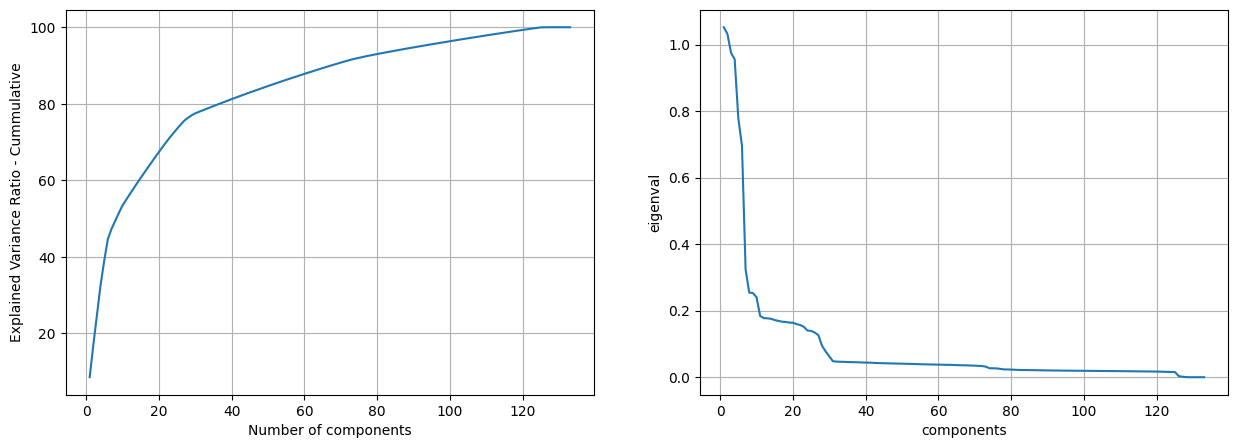

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, len(df.columns)+1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, len(df.columns)+1), pca.explained_variance_ )
plt.xlabel('components')
plt.ylabel('eigenval')

In [ ]:
pca_comp = PCA(n_components=2)
df_pca = pca_comp.fit_transform(df)

Principal Component Analysis was applied to reduce the dimensionality of the dataset. I selected two components to simplify the data while maintaining its key patterns for clustering


## Part B K-Means Modelling

Fine tuning with 2 metrics: Silhouette Score and Elbow point

In [ ]:
distortions = []
silhouettes = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=42)
    cluster_label=kmeanModel.fit_predict(df_pca)
    silhouette_avg = silhouette_score(df_pca, cluster_label)
    print(f"{k} Clusters, silhouette score: {silhouette_avg}")
    distortions.append(kmeanModel.inertia_)
    silhouettes.append(silhouette_avg)

2 Clusters, silhouette score: 0.32201028474716403
3 Clusters, silhouette score: 0.34807869435429684
4 Clusters, silhouette score: 0.3310730984087503
5 Clusters, silhouette score: 0.3207268172777005
6 Clusters, silhouette score: 0.33834066915286337
7 Clusters, silhouette score: 0.331433692104416
8 Clusters, silhouette score: 0.3274476294918277
9 Clusters, silhouette score: 0.32460370917736375


Based on the silhouette score, the optimal K is **3 clusters.**

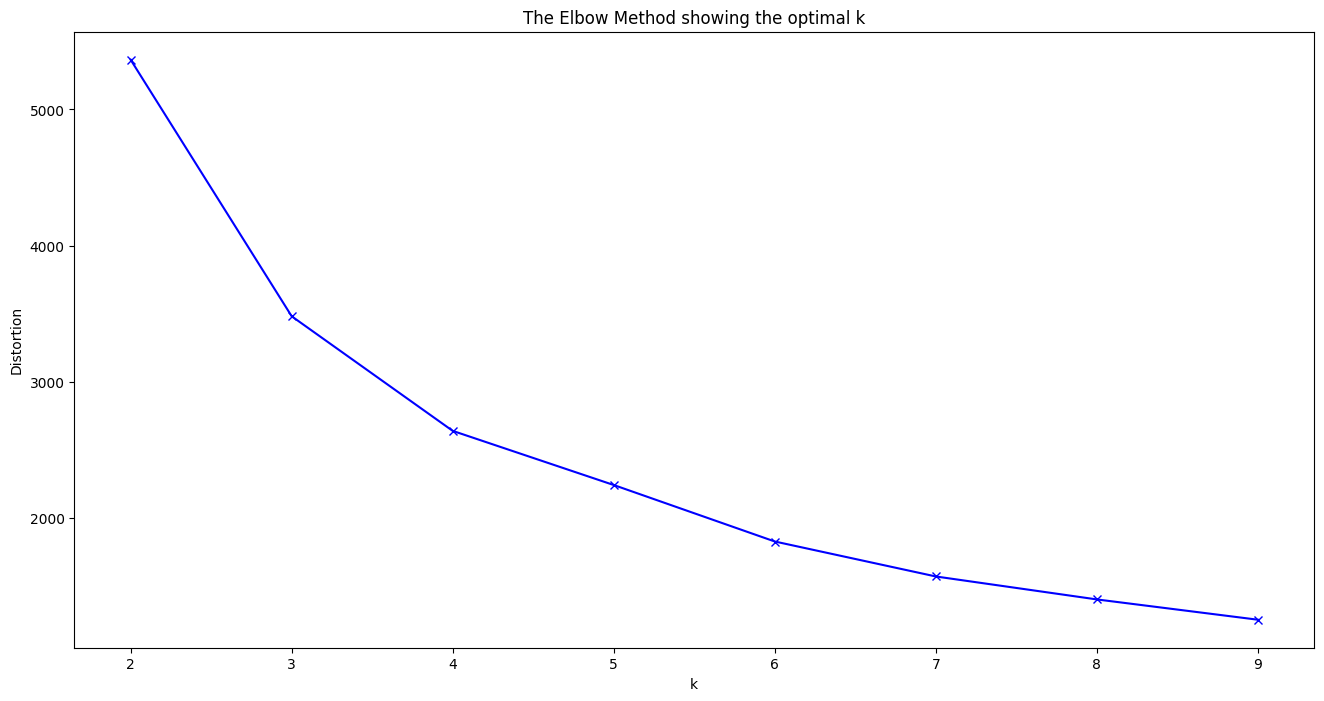

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The curve begins to flatten (distortion decrease slower) on **K = 3 / K= 4**.


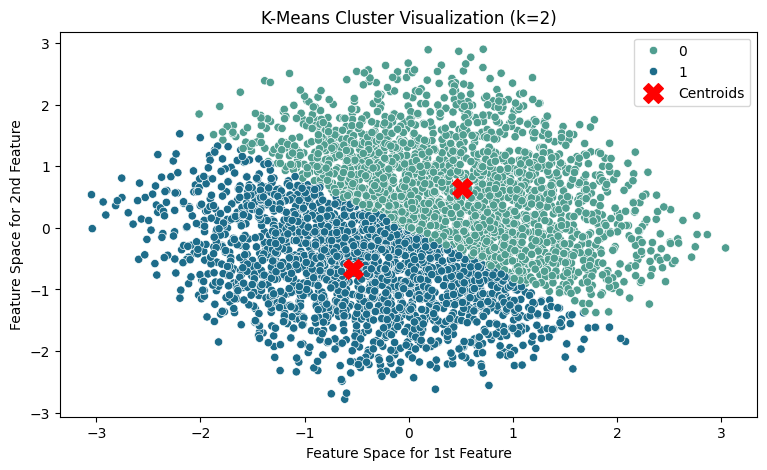

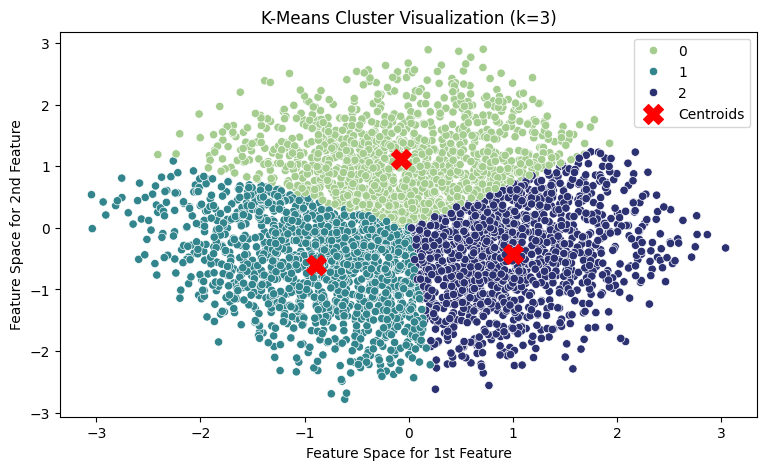

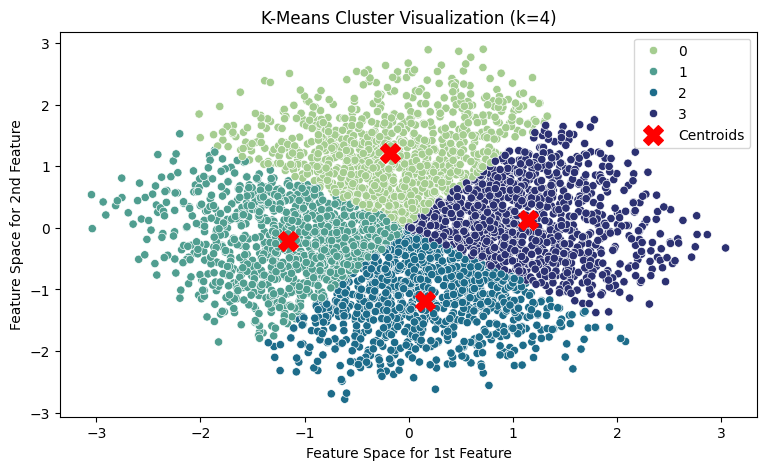

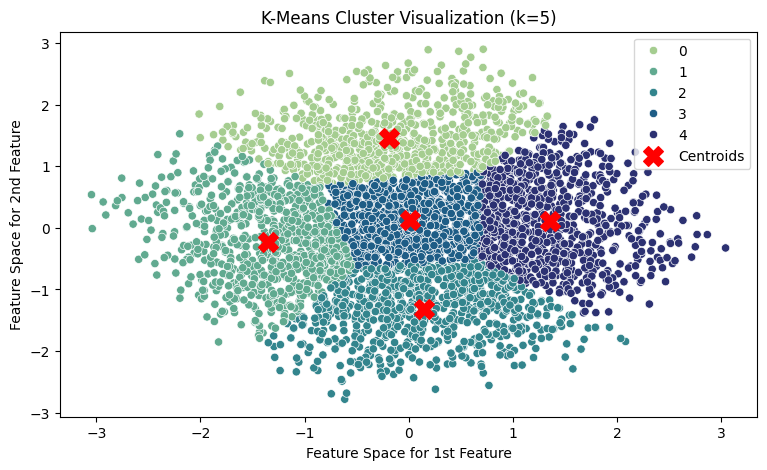

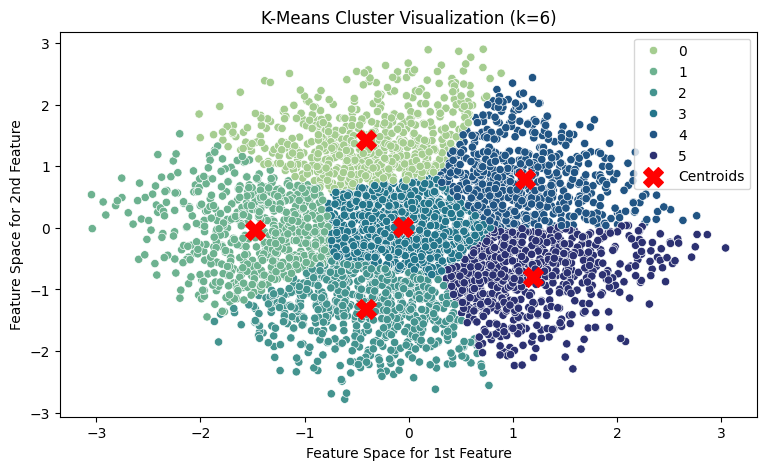

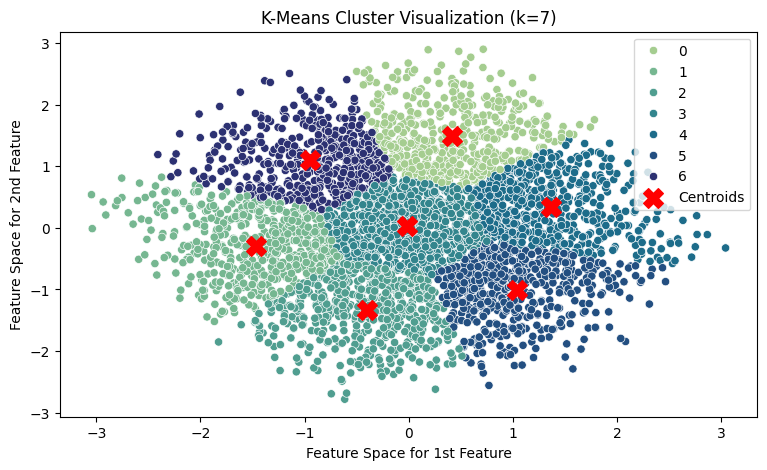

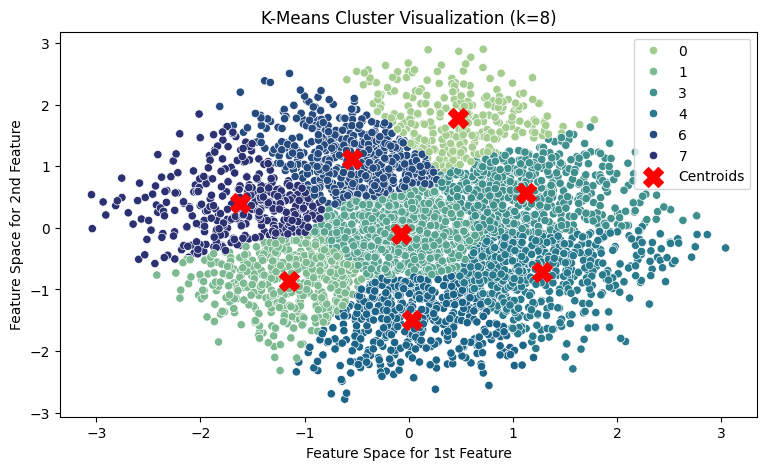

In [ ]:
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    pred = kmeans.fit_predict(df_pca)

    plt.figure(figsize=(9, 5))
    sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=pred, palette="crest")
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],c='red', s=200, marker='X', label='Centroids')
    plt.xlabel('Feature Space for 1st Feature')
    plt.ylabel('Feature Space for 2nd Feature')
    plt.title(f'K-Means Cluster Visualization (k={n_clusters})')
    plt.legend()
    plt.show()


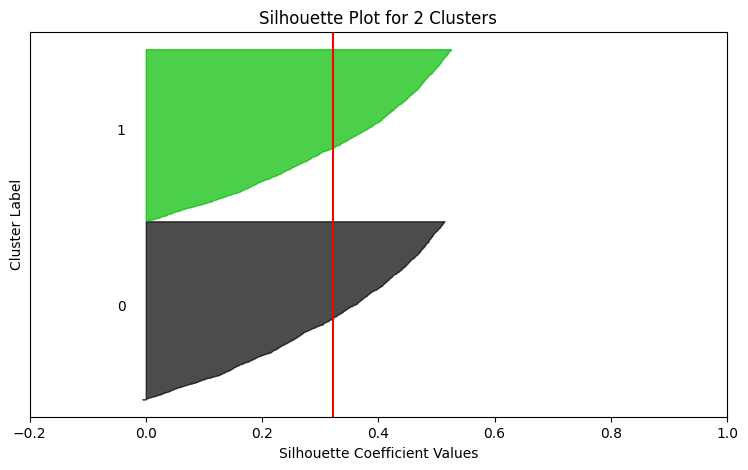

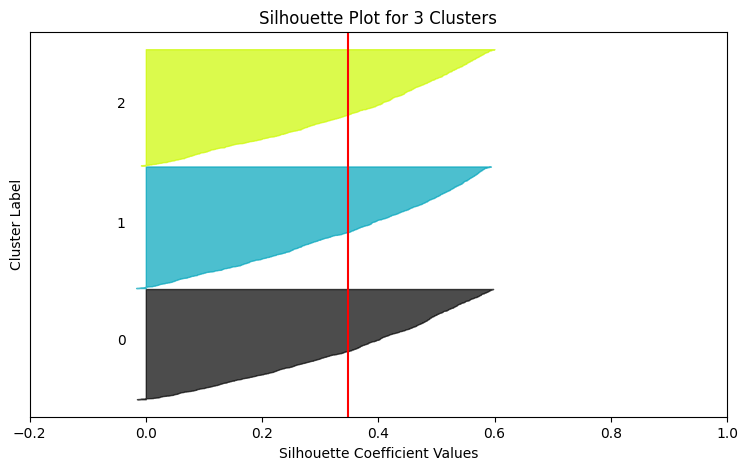

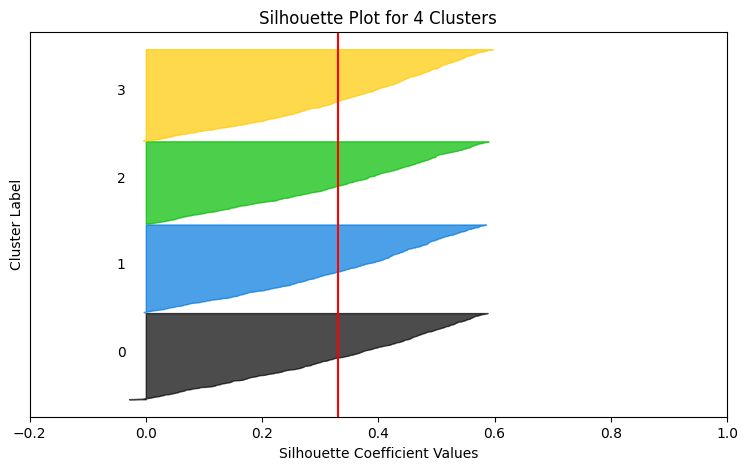

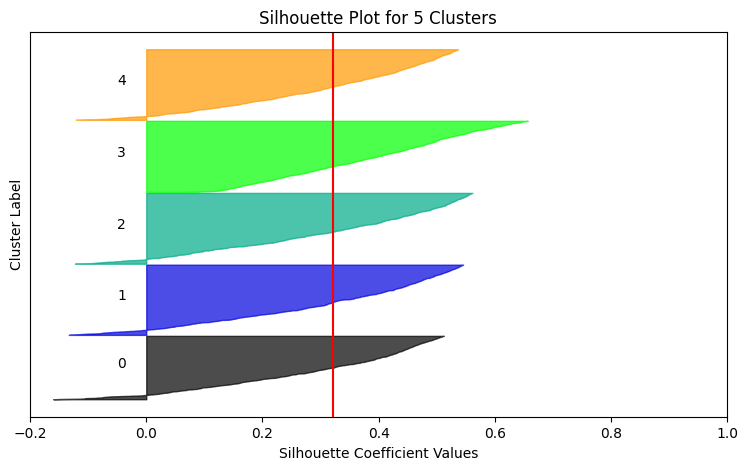

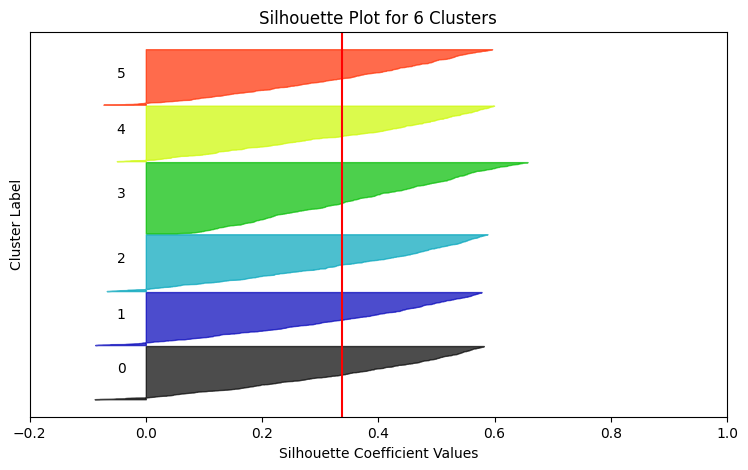

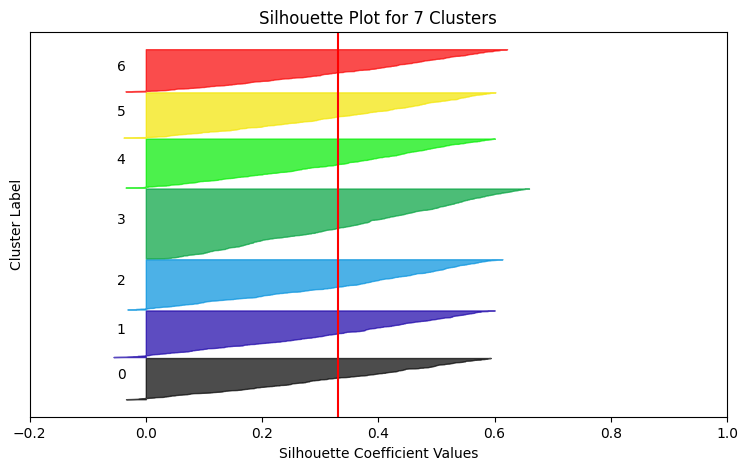

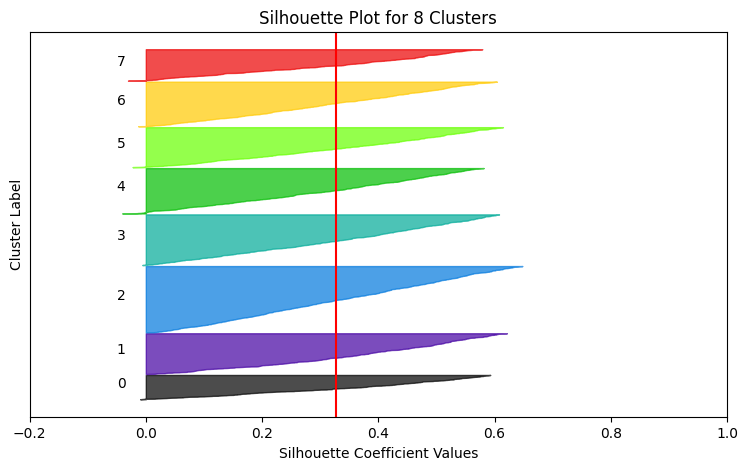

In [ ]:
for n_clusters in range(2, 9):
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(9, 5)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_pca)

    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title(f"Silhouette Plot for {n_clusters} Clusters")
    ax1.set_xlabel("Silhouette Coefficient Values")
    ax1.set_ylabel("Cluster Label")
    ax1.axvline(x=silhouette_avg, color="red")
    ax1.set_yticks([])
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()


Take K = 3 as final model
In k=3, ost clusters have silhouette scores above 0.3,  However there re some data points with lower scores which suggests room for improvement in cluster distinctiveness.

In [ ]:
model = KMeans(n_clusters = 3, random_state =42)
pred = model.fit_predict(df_pca)
df_kmeans['Cluster'] = pred
pred

array([2, 1, 2, ..., 2, 0, 0], dtype=int32)

In [ ]:
df_kmeans

,Gender,Purchase Amount (USD),Size,Review Rating,Subscription Status,Discount Applied,Promo Code Used,Previous Purchases,Age,Purchase Count,...,Location_Wyoming,Season_Spring,Season_Summer,Season_Winter,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly,Cluster
0,1,53,2.0,3.1,1,1,1,14,56,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2
1,1,64,2.0,3.1,1,1,1,2,20,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
2,1,73,0.0,3.1,1,1,1,23,51,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
3,1,90,1.0,3.5,1,1,1,49,22,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,1,49,1.0,2.7,1,1,1,31,46,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0,28,2.0,4.2,0,0,0,32,41,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2
3896,0,49,2.0,4.5,0,0,0,41,53,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3897,0,33,2.0,2.9,0,0,0,24,47,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
3898,0,77,0.0,3.8,0,0,0,24,45,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0


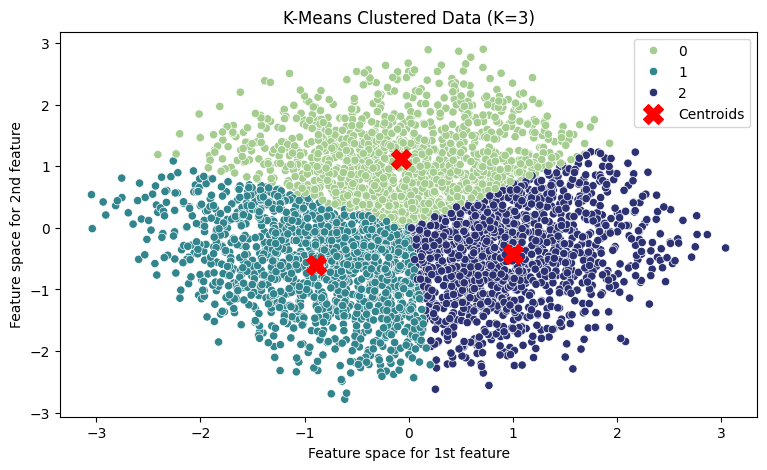

In [ ]:
plt.figure(figsize=(9,5))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=pred, palette='crest')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.xlabel('Feature space for 1st feature')
plt.ylabel('Feature space for 2nd feature')
plt.title('K-Means Clustered Data (K=3)')
plt.legend()
plt.show()


The clusters are well separated which illustrates the model's to partition customers effectively based on their purchasing behavior and attributes.

## Part C Cluster Characteristic Analysis

In [ ]:
#Cluster traits
cluster_traits = df_kmeans.groupby('Cluster').mean()
print(cluster_traits)


           Gender  Purchase Amount (USD)      Size  Review Rating  \
Cluster                                                             
0        0.681781              75.881781  1.327935       4.170364   
1        0.653451              59.427313  1.280470       3.818062   
2        0.706063              44.840368  1.353799       3.280276   

         Subscription Status  Discount Applied  Promo Code Used  \
Cluster                                                           
0                   0.267206          0.421862         0.421862   
1                   0.244493          0.405286         0.405286   
2                   0.299309          0.463546         0.463546   

         Previous Purchases        Age  Purchase Count  ...  \
Cluster                                                 ...   
0                 34.235628  48.639676             1.0  ...   
1                 14.196035  33.875918             1.0  ...   
2                 28.591711  53.382962             1.0  ...   

  

Cluster
0    1235
1    1362
2    1303
Name: count, dtype: int64


<ipython-input-37-3da8674f0af2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='crest')


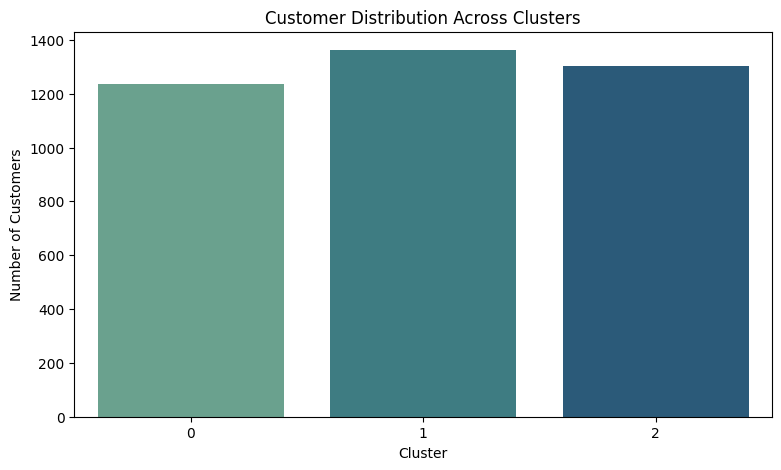

In [ ]:
#Customer distribution across clusters
cluster_counts = df_kmeans['Cluster'].value_counts().sort_index()
print(cluster_counts)
plt.figure(figsize=(9,5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='crest')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution Across Clusters')
plt.show()


<ipython-input-38-b52fb766095c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_kmeans, x='Cluster', y='Age', palette='crest')


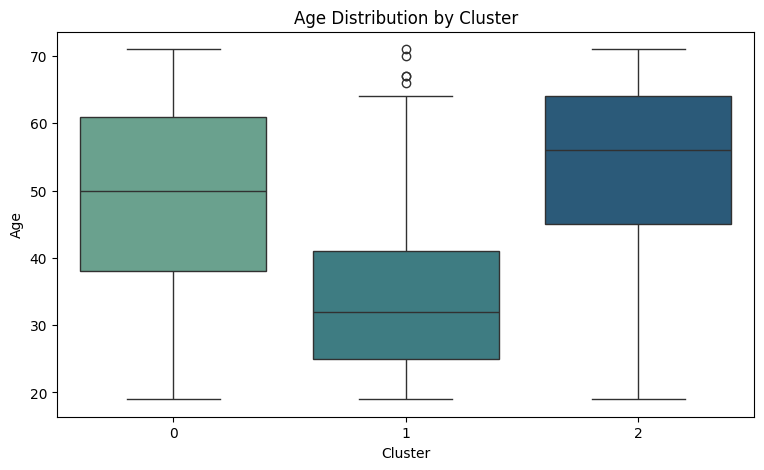

In [ ]:
plt.figure(figsize=(9,5))
sns.boxplot(df_kmeans, x='Cluster', y='Age', palette='crest')
plt.title('Age Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()


<ipython-input-39-3253c69725fa>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(df_kmeans, x='Cluster', y='Purchase Amount (USD)', ci=None)


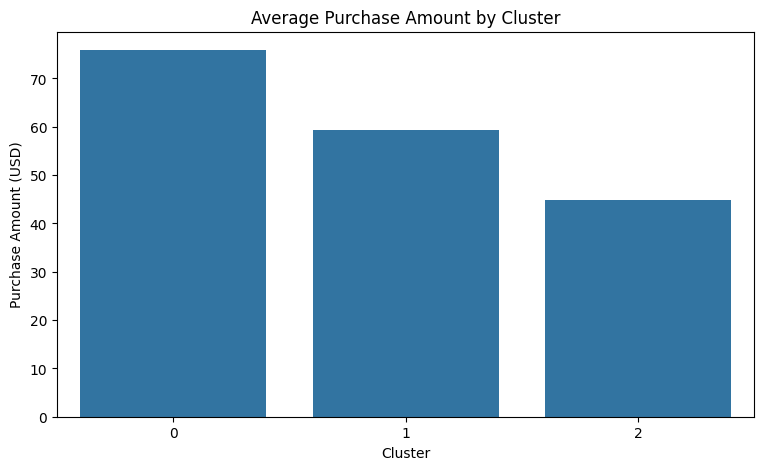

In [ ]:
#Average purchase amount by cluster
plt.figure(figsize=(9, 5))
sns.barplot(df_kmeans, x='Cluster', y='Purchase Amount (USD)', ci=None)
plt.title('Average Purchase Amount by Cluster')
plt.ylabel('Purchase Amount (USD)')
plt.xlabel('Cluster')
plt.show()

<ipython-input-40-a203891579b3>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(df_kmeans, x='Cluster', y='Discount Applied', ci=None)


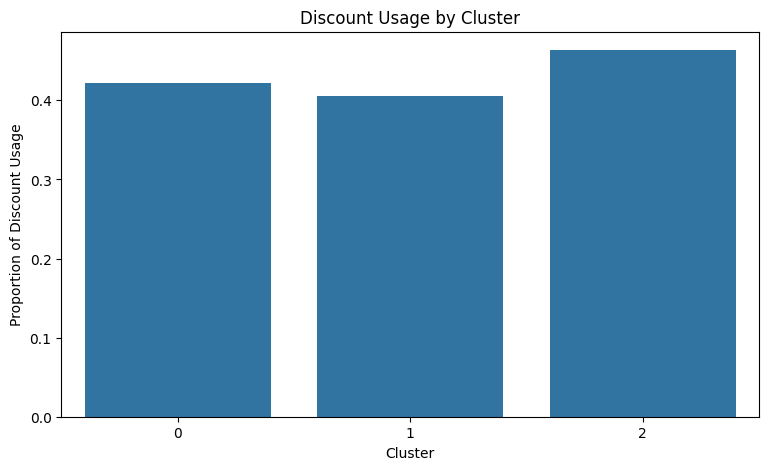

In [ ]:
plt.figure(figsize=(9, 5))
sns.barplot(df_kmeans, x='Cluster', y='Discount Applied', ci=None)
plt.title('Discount Usage by Cluster')
plt.ylabel('Proportion of Discount Usage')
plt.xlabel('Cluster')
plt.show()

**Analysis**  
Based on the traits summary and visualization,each cluster shows different customer behaviors and preferences:

1. Cluster 1 (previously known as Cluster 0)
- Middle-aged (49 years old), mostly male
- Highest spending (75.88 USD) and highest satisfaction (4.17 rating)
- Moderate subscription and discount usage  
Suggestion: introducing a premium loyalty program offering benefits such as early access to exclusive product

2. Cluster 2
- Youngest group (34 years old), mostly male (but also least than the other clusters)
- Moderate spending (59.43 USD) and average satisfaction
- Lowest subscription and discount usage  
Suggestion: utilize social media for trendy marketing campaigns to reach the young audiences.

3. Cluster 3
- Oldest group (53 years old)
- Lowest spending (44.84 USD) and lowest satisfaction
- Highest subscription and discount usage   
Suggestion: offering bundle deals or senior citizen discounts
